In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import scipy.io as sio
import os
import glob


In [6]:
dirname='/mnt/f/Torsion_correction_data/Image_00001_AO001R_896_512_600_50_1.57_12000_-ve0.13_Nd0.0_20ms/registervol_combine'
filename=dirname+'/1/1_registeredvol.mat'

vol1=sio.loadmat(filename)['registered_vol']

In [33]:
import pickle
import SimpleITK as sitk

shifted=np.zeros( (26, 512, 600), dtype="complex")
avg_im=np.zeros( (26, 512, 600))
avg_nonzero = np.zeros( (26, 512, 600))

file=open('./data/xforms_itk.pickle','rb')
itk_xforms=pickle.load(file)

dirname='/mnt/f/Torsion_correction_data/Image_00001_AO001R_896_512_600_50_1.57_12000_-ve0.13_Nd0.0_20ms/registervol_combine'
newdir='/mnt/f/Torsion_correction_data/Image_00001_AO001R_896_512_600_50_1.57_12000_-ve0.13_Nd0.0_20ms/torsion_DEL'

# Note: nframe should be the one-based filename
for nframe in np.arange(10,400):
    # abs is needed just for 0
    dir1=dirname+  '/%d'%(((nframe-1)//50)+1)
    newdir1=newdir+'/%d'%(((nframe-1)//50)+1)

    filebase='/%d_registeredvol.mat'%(nframe) # Number will be file number: nframe=1 = file1 (not zero-based)
    filename=dir1+filebase
    
    vol1=sio.loadmat(filename)['registered_vol']

    print('\nF%03d'%nframe,end=' ')
    
    axials=np.arange(np.shape(vol1)[0])
    axials=[13,14,15,16,17]
    
    basename=filename[:-4]
    xform1=itk_xforms[nframe-1] # 0 based to 1-based

    for nlayer in axials :
        print(nlayer,end=' ')
        layer1=vol1[nlayer,:,:]
        realpart=np.abs(layer1)
        imagpart=np.angle(layer1)
        
        realpart = np.flipud( np.rot90(realpart) )
        imagpart = np.flipud( np.rot90(imagpart) )

        out_im = sitk.Resample(sitk.GetImageFromArray(realpart), xform1, sitk.sitkLanczosWindowedSinc)
        out_im_arr = np.reshape( out_im, (600,512))
        out_im_arr = np.rot90( np.flipud( out_im_arr), -1 )
        avg_im[nlayer] += out_im_arr
        avg_nonzero[nlayer] += (out_im_arr > 0)
        
        out_complex = sitk.Resample(sitk.GetImageFromArray(imagpart), xform1, sitk.sitkLanczosWindowedSinc)
        out_complex = np.reshape( out_complex, (600,512))
        out_complex = np.rot90( np.flipud( out_complex), -1 )
        
        shifted[nlayer] = out_im_arr + 1j * out_complex
    
    newname=newdir1+filebase[:-4]+'_rot.mat'
    #newname=basename+'_rot_real.mat'
    sio.savemat(newname,{'registered_vol':shifted})
#        for layer in np.arange(np.shape(vol1[0])):
            
avg_nonzero[avg_nonzero==0]=1 # Prevent divide by zero. If all frames are 0, total will be zero so /1 is okay
avg_im /= avg_nonzero
# avg_im[isnan(avg_im)]=0 # This would also work

newname=newdir1+filebase[:-4]+'_AVE_rot.mat'
sio.savemat(newname,{'avg_vol':avg_im})
#xform=itk_xforms[nframe]

 #   
  #  shifted[:,:,nframe] = sitk.GetArrayFromImage(out_im)
        
    


F010 13 14 15 16 17 
F011 13 14 15 16 17 
F012 13 14 15 16 17 
F013 13 14 15 16 17 
F014 13 14 15 16 17 
F015 13 14 15 16 17 
F016 13 14 15 16 17 
F017 13 14 15 16 17 
F018 13 14 15 16 17 
F019 13 14 15 16 17 
F020 13 14 15 16 17 
F021 13 14 15 16 17 
F022 13 14 15 16 17 
F023 13 14 15 16 17 
F024 13 14 15 16 17 
F025 13 14 15 16 17 
F026 13 14 15 16 17 
F027 13 14 15 16 17 
F028 13 14 15 16 17 
F029 13 14 15 16 17 
F030 13 14 15 16 17 
F031 13 14 15 16 17 
F032 13 14 15 16 17 
F033 13 14 15 16 17 
F034 13 14 15 16 17 
F035 13 14 15 16 17 
F036 13 14 15 16 17 
F037 13 14 15 16 17 
F038 13 14 15 16 17 
F039 13 14 15 16 17 
F040 13 14 15 16 17 
F041 13 14 15 16 17 
F042 13 14 15 16 17 
F043 13 14 15 16 17 
F044 13 14 15 16 17 
F045 13 14 15 16 17 
F046 13 14 15 16 17 
F047 13 14 15 16 17 
F048 13 14 15 16 17 
F049 13 14 15 16 17 
F050 13 14 15 16 17 
F051 13 14 15 16 17 
F052 13 14 15 16 17 
F053 13 14 15 16 17 
F054 13 14 15 16 17 
F055 13 14 15 16 17 
F056 13 14 15 16 17 
F057 13 14 1

In [ ]:
np.shape(realpart)

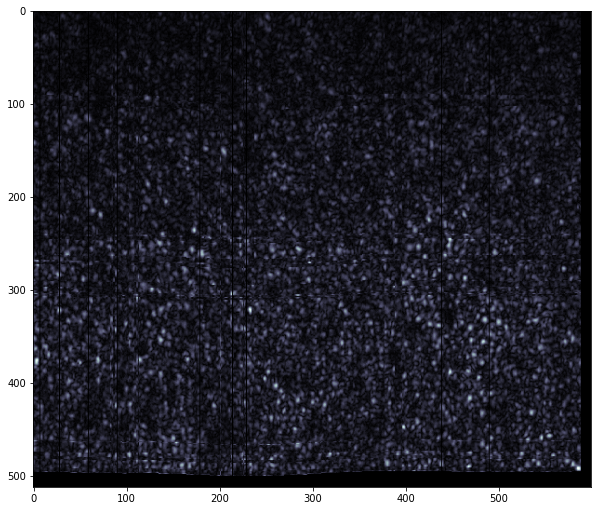

In [34]:
figure(figsize=(10,10))
plt.imshow(np.abs(vol1[14,:,:]), cmap='bone')

In [ ]:
newname=newdir1+filebase[:-4]+'_AVE_rot.mat'
sio.savemat(newname,{'avg_vol_rot':avg_im }  )

In [30]:
np.max(avg_im[12:17],axis=0)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [22]:
avg_im[isnan(avg_im)]=0

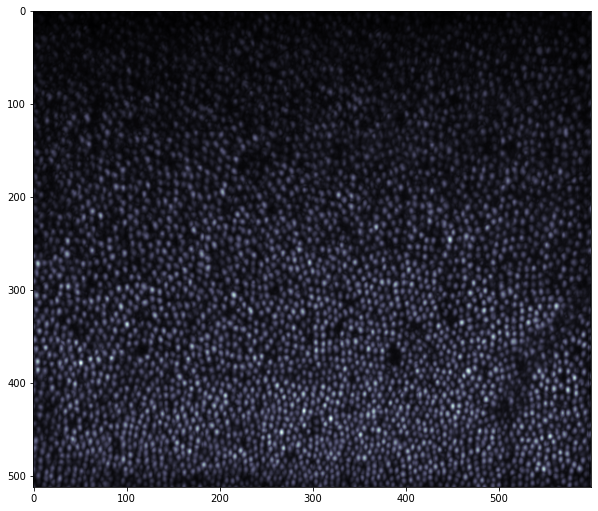

In [35]:
figure(figsize=(10,10))
plt.imshow( ((np.max( avg_im,axis=0) )), cmap='bone')
plt.savefig('corrected.png')

In [ ]:
np.array(flipud)

In [ ]:
def readvol1(dirname,num,per_dir):
    if per_dir==1:
        dir1=dirname+'/'
    else:
        dir1=

In [ ]:
# Find the center relative to what Cooper's code thought was the center,
# using the ref. frame it picked (193 for python, which is MATLAB #194)

frame0_raw = vid_raw.data[ref_idx].astype('float32')
frame0_stab = vid_stab.data[:,:,ref_idx].astype('float32')

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow( avg_im[23-16])

In [76]:
# DELETE THIS

import pickle
import SimpleITK as sitk

shifted=np.zeros( (26, 512, 600 ), dtype='complex')
avg_im=np.zeros( (26, 512, 600))

file=open('./data/xforms_itk.pickle','rb')
itk_xforms=pickle.load(file)

#c #?
newdir='/mnt/f/Torsion_correction_data/Image_00001_AO001R_896_512_600_50_1.57_12000_-ve0.13_Nd0.0_20ms/torsion_padded'

for nframe in [268]: #np.arange(1,401):
    # abs is needed just for 0
    dir1=dirname +  '/' #'/%d'%((abs(nframe-1)//50)+1) #for padded, no subdir
    newdir1=newdir+'/' #'/%d'%((abs(nframe-1)//50)+1)

    filebase='/%d_registeredvol.mat'%(nframe)
    filename=dir1+filebase
    
    vol1=sio.loadmat(filename)['registered_vol']

    print('\nF%03d'%nframe,end=' ')
    
    axials=np.arange(np.shape(vol1)[0])
    #axials=[23-16]
    
    basename=filename[:-4]
    for nlayer in axials :
        print(nlayer,end=' ')
        layer1=vol1[nlayer,:,:]
        realpart=np.abs(layer1)
        imagpart=np.angle(layer1)
        xform1=itk_xforms[nlayer]
        
        # The actualy center was determined by cross-correlating the reference image Cooper's code
        # used (from frame 193 of the cropped images), with the padded images. Thus we find where
        # the middle of the original/learned affine (512/2,600/2), in relation to the padded volumes 
        new_center=(384,368)
        xform1.SetCenter(new_center) #
        
        out_im = sitk.Resample(sitk.GetImageFromArray(realpart), xform1, sitk.sitkLanczosWindowedSinc)
        out_im_arr = np.reshape( out_im, (512,600))
        avg_im[nlayer] += out_im_arr

        out_angle = sitk.Resample(sitk.GetImageFromArray(imagpart), xform1, sitk.sitkLanczosWindowedSinc)
        out_angle = np.reshape( out_angle, (512,600))

        shifted[nlayer] = out_im_arr + 1j * out_angle

    newname=newdir1+filebase[:-4]+'_rot.mat'
   # sio.savemat(newname,{'registered_vol':shifted})
            
avg_im /= nframe

newname=newdir1+filebase[:-4]+'_AVE_rot.mat'
#sio.savemat(newname,{'avg_vol_rot':avg_im})
#xform=itk_xforms[nframe]

 #   
  #  shifted[:,:,nframe] = sitk.GetArrayFromImage(out_im)
        
    

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/f/Torsion_correction_data/Image_00001_AO001R_896_512_600_50_1.57_12000_-ve0.13_Nd0.0_20ms/registervol_combine//268_registeredvol.mat'

In [152]:
file=open('./data/xforms_itk.pickle','rb')
itk_xforms=pickle.load(file)

diags=np.zeros(401)
# Note: nframe should be the one-based filename
for nframe in np.arange(1,400):
    xform1=np.reshape( itk_xforms[nframe-1].GetMatrix(), (2,2) )
    diags[nframe]=np.sqrt((1*xform1[0,1]**2+1*xform1[1,0]**2))

[[ 9.99644451e-01 -8.84461328e-05]
 [-2.31438639e-02  9.99470412e-01]]


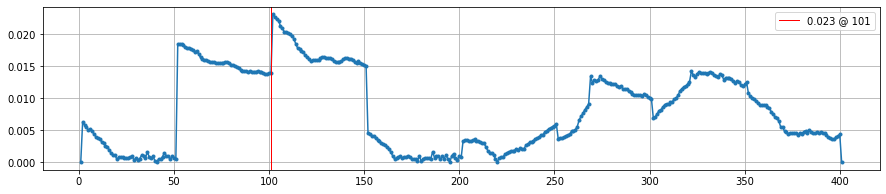

In [154]:
maxloc=np.where( diags==np.max(diags) )[0][0]

plt.figure(figsize=(15,3))
plt.plot( np.arange(1,402), diags, marker='.' )
plt.grid()
plt.axvline(maxloc, color='r', lw=1, label='%0.3f @ %d'%(max(diags),maxloc) )
plt.legend()

print( np.reshape( itk_xforms[maxloc-1].GetMatrix(), (2,2) ) )

In [265]:
import torsion_params
len(glob.glob(torsion_params.volumes))

400

In [300]:
%load_ext autoreload
%autoreload 2

In [322]:
(np.array( xform_info["xforms"][3].GetCenter())+ 0.5 ) * 2

array([  5., 512.])

In [323]:
file=open('data/xform_info.pickle','rb')
xform_info=pickle.load(file)

In [329]:
for xf1 in xform_info:
    if not xf1=='xforms':
        print ('%s: %s'%(str(xf1),str(xform_info[xf1]) ) )

ref_idx: 193
shape: (600, 512, 400)


In [333]:
xform_info['xforms'][0].GetCenter()

(299.5, 255.5)

In [ ]:
file=open('data/xform_info.pickle','rb')
xform_info=pickle.load(file)

print( 'Input is in: %s'%torsion_params.volume_directory)

filename1=glob.glob(torsion_params.volumes)[0]
vol1=sio.loadmat(filename1)['registered_vol']
print('Volumes have shape: '+str(vol1.shape))

shape_compute=xform_info['shape']

if all ((not(torsion_params.volume_rot90),shape_compute[0]==vol1.shape[1]-torsion_params.padding_pixels_each_side*2,
         shape_compute[1]==vol1.shape[2]-torsion_params.padding_pixels_each_side*2)):
    flip_volumes=False
elif all ((torsion_params.volume_rot90,shape_compute[0]==vol1.shape[2]-torsion_params.padding_pixels_each_side*2,
           shape_compute[1]==vol1.shape[1]-torsion_params.padding_pixels_each_side*2)):
    flip_volumes=True
    print ("Volume rot90 needed. Computed shape="+str(shape_compute))
else:
    print("Computed shape="+str(shape_compute)+', rot90 not specified. Cannot determine. Stopping.')
    print("To do rot90 of volumes, set volume_rot90=1 in params file.")
    sys.exit()
    
shifted=np.zeros( vol1.shape, dtype='complex')
avg_im=np.zeros( vol1.shape )
avg_nonzero_count=np.zeros(vol1.shape)

if not(os.path.exists(torsion_params.volumes_rotated_directory )):
    os.mkdir( torsion_params.volumes_rotated_directory )

for vol_file in glob.glob(torsion_params.volumes):
    nvol = int( vol_file.split('/')[-1].split('_')[0] )
    if (torsion_params.volumes_to_process is not None) and (nvol not in torsion_params.volumes_to_process):
        continue
    
    print( '\nVolume %02d -'%nvol,end=' ')
    
    vol1=sio.loadmat(vol_file)['registered_vol']
    xform1=xform_info["xforms"][nvol-1] # 0 based to 1-based:TODO, maybe switch to all one-based ?
    
    for nlayer in torsion_params.layers_to_process:
        print( nlayer, end=' ')
        
        layer1=vol1[nlayer,:,:]
        realpart=np.abs(layer1)
        imagpart=np.angle(layer1)
        
        if flip_volumes:
            realpart = np.flipud( np.rot90(realpart) )
            imagpart = np.flipud( np.rot90(imagpart) )

        if torsion_params.padding_pixels_each_side>0:
            cx,cy=xform1.GetCenter()
            cx += torsion_params.padding_pixels_each_side
            cy += torsion_params.padding_pixels_each_side
            xform1.SetCenter((cx,cy))
        
        out_im = sitk.Resample(sitk.GetImageFromArray(realpart), xform1, sitk.sitkLanczosWindowedSinc)
        out_im_arr = np.reshape( out_im, np.array(shape_compute[0:2])+torsion_params.padding_pixels_each_side*2)
        
        if flip_volumes:
            out_im_arr = np.rot90( np.flipud( out_im_arr), -1 )
            
        avg_im[nlayer] += out_im_arr
        avg_nonzero_count[nlayer] += (out_im_arr > 0)
        
        out_complex = sitk.Resample(sitk.GetImageFromArray(imagpart), xform1, sitk.sitkLanczosWindowedSinc)
        out_complex = np.reshape( out_complex, np.array(shape_compute[0:2])+torsion_params.padding_pixels_each_side*2 )
        
        if flip_volumes:
            out_complex = np.rot90( np.flipud( out_complex), -1 )
        
        shifted[nlayer] = out_im_arr + 1j * out_complex
    
    # Save all rotated layers in new reg_vol file
    newname=os.path.join(torsion_params.volumes_rotated_directory,'%d_registeredvol.mat'%nvol)
    sio.savemat(newname,{'registered_vol':shifted})

    # Overwrite average image each volume to monitor progress
    avg_nonzero_count[avg_nonzero_count==0]=1 
    newavg=os.path.join(torsion_params.volumes_rotated_directory,'avg_volume.mat')
    # Prevent divide by zero. If all frames are 0, total will be zero, so /1 is good. Using inf/nans also works.
    av_count_now=avg_nonzero_count+(avg_nonzero_count==0)*1
    sio.savemat(newavg, {'avg_volume':avg_im/av_count_now} )

print( '\n\nOutput is in: %s'%torsion_params.volumes_rotated_directory)


Input is in: /mnt/f/Torsion_correction_data/Image_00001_AO001R_896_512_600_50_1.57_12000_-ve0.13_Nd0.0_20ms/registervol_combine_padded
Volumes have shape: (26, 612, 700)
Volume rot90 needed. Computed shape=(600, 512, 400)

Volume 100 - 13 14 15 16 17 
Volume 101 - 13 14 15 16 17 
Volume 102 - 13 14 15 16 17 
Volume 103 - 13 14 15 16 17 
Volume 104 - 13 14 15 16 17 
Volume 105 - 13 14 15 16 17 
Volume 106 - 13 14 15 16 17 
Volume 107 - 13 14 15 16 17 
Volume 108 - 13 14 15 16 17 
Volume 109 - 13 14 15 16 17 
Volume 10 - 13 14 15 16 17 
Volume 110 - 13 14 15 16 17 
Volume 111 - 13 14 15 16 17 
Volume 112 - 13 14 15 16 17 
Volume 113 - 13 14 15 16 17 
Volume 114 - 13 14 15 16 17 
Volume 115 - 13 14 15 16 17 
Volume 116 - 13 14 15 16 17 
Volume 117 - 13 14 15 16 17 
Volume 118 - 13 14 15 16 

array([650, 562])

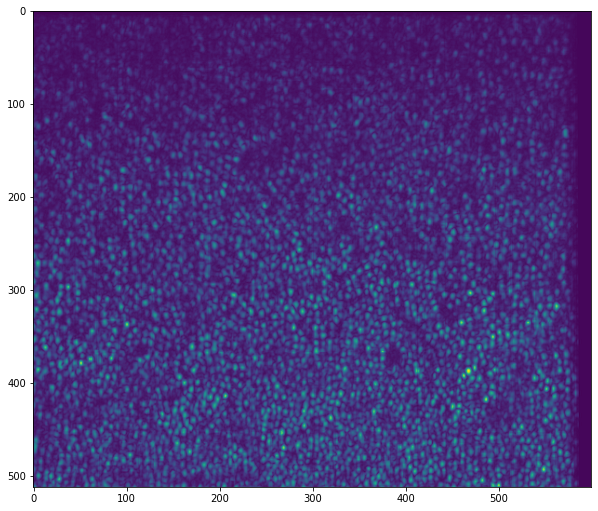

In [339]:
plt.figure(figsize=(10,10))
plt.imshow(avg_im[15])

In [229]:
import pickle
import SimpleITK as sitk

shifted=np.zeros( (26, 512, 600), dtype="complex")
avg_im=np.zeros( (26, 512, 600))
avg_nonzero = np.zeros( (26, 512, 600))

file=open('./data/xforms_itk.pickle','rb')
itk_xforms=pickle.load(file)

dirname='/mnt/f/Torsion_correction_data/Image_00001_AO001R_896_512_600_50_1.57_12000_-ve0.13_Nd0.0_20ms/registervol_combine'
newdir='/mnt/f/Torsion_correction_data/Image_00001_AO001R_896_512_600_50_1.57_12000_-ve0.13_Nd0.0_20ms/torsion_DEL'

nRef=183
dir_ref=dirname+  '/%d'%(((nRef-1)//50)+1)
filename_ref=dir_ref+'/%d_registeredvol.mat'%(nRef)
ref1=sio.loadmat(filename_ref)['registered_vol']


testframe=100 # or maxloc

# Note: nframe should be the one-based filename
for nframe in [testframe]: #np.arange(10,400):
    # abs is needed just for 0
    dir1=dirname+  '/%d'%(((nframe-1)//50)+1)
    newdir1=newdir+'/%d'%(((nframe-1)//50)+1)

    filebase='/%d_registeredvol.mat'%(nframe) # Number will be file number: nframe=1 = file1 (not zero-based)
    filename=dir1+filebase
    
    vol1=sio.loadmat(filename)['registered_vol']

    print('\nF%03d (%s\\%s)'%(nframe,dir1[-1],filebase.split('_')[0][1:]),end=' ')
    
    axials=np.arange(np.shape(vol1)[0])
    axials=[15] #[13,14,15,16,17]
    
    basename=filename[:-4]
    xform1=itk_xforms[nframe] # 0 based to 1-based

    for nlayer in axials :
        print(nlayer,end=' ')
        layer1=vol1[nlayer,:,:]
        realpart=np.abs(layer1)
        imagpart=np.angle(layer1)
        
        if torsion_params.
        realpart = np.flipud( np.rot90(realpart) )
        imagpart = np.flipud( np.rot90(imagpart) )

        out_im = sitk.Resample(sitk.GetImageFromArray(realpart), xform1, sitk.sitkLanczosWindowedSinc)
        out_im_arr = np.reshape( out_im, (600,512))
        out_im_arr = np.rot90( np.flipud( out_im_arr), -1 )
        avg_im[nlayer] += out_im_arr
        avg_nonzero[nlayer] += (out_im_arr > 0)
        
        out_complex = sitk.Resample(sitk.GetImageFromArray(imagpart), xform1, sitk.sitkLanczosWindowedSinc)
        out_complex = np.reshape( out_complex, (600,512))
        out_complex = np.rot90( np.flipud( out_complex), -1 )
        
        shifted[nlayer] = out_im_arr + 1j * out_complex
    
    newname=newdir1+filebase[:-4]+'_rot.mat'
    #newname=basename+'_rot_real.mat'
    #sio.savemat(newname,{'registered_vol':shifted})
#        for layer in np.arange(np.shape(vol1[0])):
            
avg_nonzero[avg_nonzero==0]=1 # Prevent divide by zero. If all frames are 0, total will be zero so /1 is okay
avg_im /= avg_nonzero
# avg_im[isnan(avg_im)]=0 # This would also work

newname=newdir1+filebase[:-4]+'_AVE_rot.mat'
#sio.savemat(newname,{'avg_vol':avg_im})
#xform=itk_xforms[nframe]

 #   
  #  shifted[:,:,nframe] = sitk.GetArrayFromImage(out_im)
        
    


F100 (2\100) 15 

In [201]:
dir1[-1]

'2'

In [218]:
np.shape(realpart)

(600, 512)

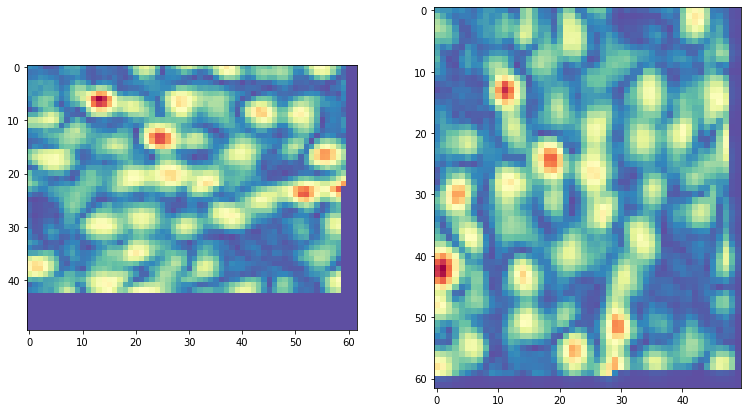

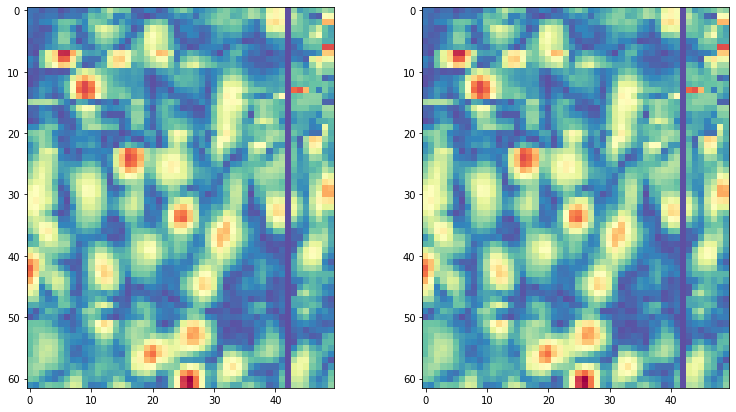

In [250]:
yidx=550
xidx=450
plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
plt.imshow( (np.abs(realpart))[yidx:,xidx:], cmap='Spectral_r' )
plt.subplot(1,2,2)
plt.imshow( np.abs(shifted[15,xidx:,yidx:]), cmap='Spectral_r' )
plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
plt.imshow( np.abs(ref1[15,xidx:,yidx:]), cmap='Spectral_r' )
plt.subplot(1,2,2)
plt.imshow( np.abs(ref1[15,xidx:,yidx:]), cmap='Spectral_r' )

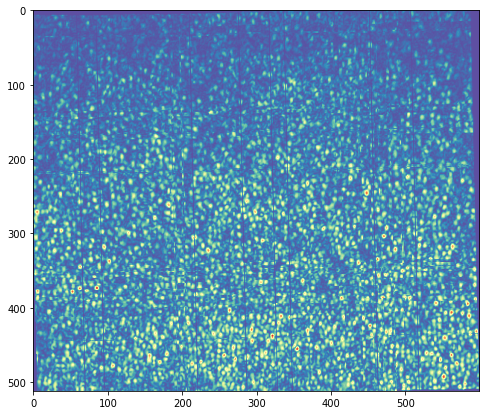

In [193]:
plt.figure(figsize=(8,8))
plt.imshow( np.abs(shifted[15,:,:]), cmap='Spectral_r' )

In [198]:
np.shape(shifted[15,:,:])

(512, 600)

In [194]:
T=xform1.GetTranslation()
xfmat=np.hstack( (np.reshape( xform1.GetMatrix(), (2,2) ), [[T[0]],[T[1]]] ) )
xfmat=np.vstack( (xfmat, [0, 0, 1]) )

sio.savemat('/mnt/c/Users/Vimal/code/Eye-Motion-Repair/xform.mat',{'xform':xfmat})

In [189]:
pwdT

'/mnt/c/Users/Vimal/code/Eye-Motion-Repair'

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow( np.abs(shifted[15]) )